In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 농어 길이 및 무게

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
# 차원 확인

print(perch_length.shape, perch_weight.shape)

(56,) (56,)


In [13]:
# 예측까지 실행하라

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, test_size = 0.25, random_state = 42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
# 훈련 모델 생성

knr = KNeighborsRegressor(3)


# 훈련시키기

knr.fit(train_input, train_target)


# 훈련모델 검증하기 (결정계수)

knr.score(test_input, test_target)

0.9746459963987609

In [14]:
# 임의의 값 예측하기

print(knr.predict([[50]]))

[1033.33333333]


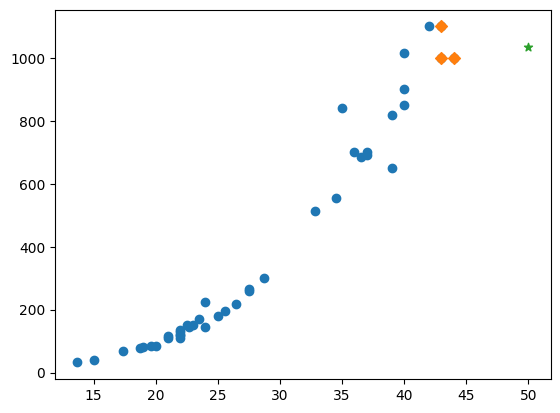

In [27]:
# 산점도 그리기
# 훈련 데이터, 50cm, 이웃 3개 산점도 모두 그리기

# 이웃 3개 찾기

distances, indexes = knr.kneighbors([[50]])


# 훈련데이터 산점도 그리기

plt.scatter(train_input, train_target)


# 이웃 3개 산점도 그리기

plt.scatter(train_input[indexes], train_target[indexes], marker='D')


# 50cm 산점도 그리기

plt.scatter(50, knr.predict([[50]]), marker='*')


In [28]:
# 농어 길이 100에 대해서 예측해보기

print(knr.predict([[100]]))


# 50과 같은 값이 나왔다.
#

[1033.33333333]


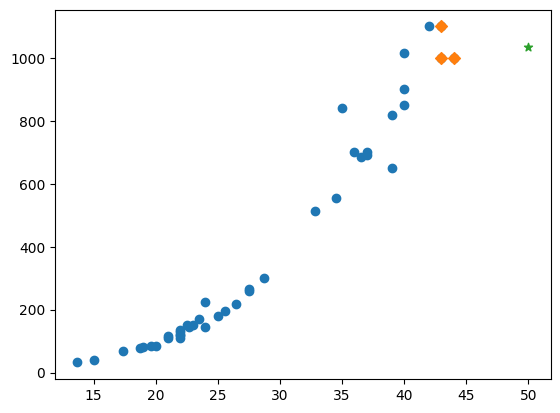

In [29]:
# 산점도 그리기
# 훈련 데이터, 100cm, 이웃 3개 산점도 모두 그리기

# 이웃 3개 찾기

distances, indexes = knr.kneighbors([[100]])


# 훈련데이터 산점도 그리기

plt.scatter(train_input, train_target)


# 이웃 3개 산점도 그리기

plt.scatter(train_input[indexes], train_target[indexes], marker='D')


# 50cm 산점도 그리기

plt.scatter(50, knr.predict([[50]]), marker='*')



# KNN 의 한계
# KNN 모델은 이웃하는 가장 가까운 개수를 체크하기 때문에
# 예측에 어려움이 있음

# 선형회귀(Linear Regression)

In [30]:
"""
널리 사용되는 대표적인 회귀 알고리즘
비교적 간단하고, 성능이 뛰어나 회귀모델 수행 시 초반에 주로 진행

선형회귀의 역할 : 하나의 특성을 가장 잘 나타내는 직선(추세선)을 찾아내는 것,
                : ax + c 직선을 가진다.

훈련(fit), 평가(score), 예측(predict) 함수는 모두 기존과 동일
"""

'\n널리 사용되는 대표적인 회귀 알고리즘\n비교적 간단하고, 성능이 뛰어나 회귀모델 수행 시 초반에 주로 진행\n선형회귀의 역할 : 하나의 특성을 가장 잘 나타내는 직선(추세선)을 찾아내는 것,\n훈련(fit), 평가(score), 예측(predict) 함수는 모두 기존과 동일\n'

In [31]:
# 선형회귀 모델 라이브러리 불러들이기

from sklearn.linear_model import LinearRegression

In [32]:
# 모델 생성하기

lr = LinearRegression()
lr

LinearRegression()

In [33]:
# 훈련시키기

lr.fit(train_input, train_target)

LinearRegression()

In [38]:
# KNN에서 농어의 길이 50을 1033으로 예측
# 선형회귀모델은 50을 어떻게 예측할까?

print(lr.predict([[50],[100]]))

[1241.83860323 3192.69585141]


In [39]:
# 기울기와 y 절편 확인하기
# 선형회귀모델 : y = a * x + b

print("기울기 = ", lr.coef_, "\n 절편 = ", lr.intercept_)

기울기 =  [39.01714496] 
 절편 =  -709.0186449535477


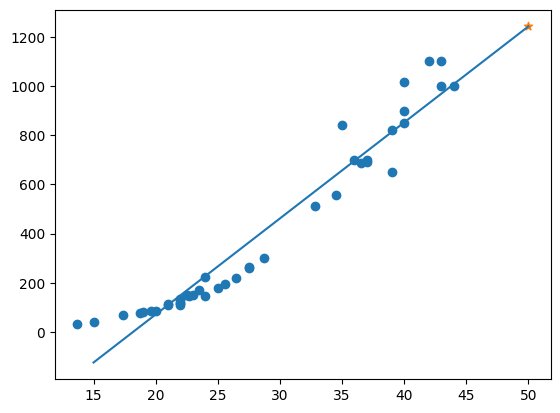

In [42]:
# 산점도 그리기
# 훈련데이터, 50길이, 추세선 모두 그리기

plt.scatter(train_input, train_target)
plt.scatter(50, lr.predict([[50]]), marker='*')
plt.plot([15,50], [lr.coef_ * 15 + lr.intercept_,
                 lr.coef_ * 50 + lr.intercept_])